In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample data loading (Replace with actual data file if available)


In [3]:
data = pd.DataFrame({
    "Customer_Code": np.random.randint(1, 46, 100),
    "Country_Name": np.random.choice(["USA", "Germany", "India", "UK"], 100),
    "Quantity_Required": np.random.randint(1, 100, 100),
    "Total_Area": np.random.randint(10, 500, 100),
    "Amount": np.random.randint(100, 5000, 100),
    "Item_Name": np.random.choice(["Hand Tufted", "Durry", "Kilims"], 100),
    "Quality_Name": np.random.choice(["Premium", "Standard", "Economy"], 100),
    "Design_Name": np.random.randint(1, 50, 100),
    "Color": np.random.choice(["Red", "Blue", "Green", "Beige"], 100),
    "Order_Type": np.random.choice([0, 1], 100)  # 1 = Order, 0 = Sample
})


# Encode categorical variables


In [4]:
label_encoders = {}
for col in ["Country_Name", "Item_Name", "Quality_Name", "Color"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature scaling

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop("Order_Type", axis=1))

# Customer segmentation using K-Means

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Customer_Segment'] = kmeans.fit_predict(data_scaled)

# Train a classification model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("Order_Type", axis=1), data["Order_Type"], test_size=0.2, random_state=42
)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model evaluation

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.58      0.70      0.64        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



# Visualizing customer segments

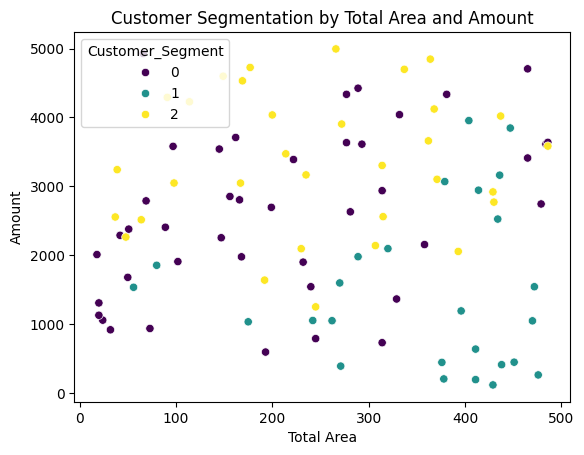

In [10]:
sns.scatterplot(x=data['Total_Area'], y=data['Amount'], hue=data['Customer_Segment'], palette='viridis')
plt.xlabel("Total Area")
plt.ylabel("Amount")
plt.title("Customer Segmentation by Total Area and Amount")
plt.show()